In [31]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [32]:
csv_path = './1_performance/speedup.csv'
workload_list = ['gcc', 'bwaves', 'mcf', 'cactu', 'namd', 'parest', 'lbm', 'omnetpp', 'wrf', 'x264_r', 'blender', 'deepsjeng', 'nab', 'fotonik3d', 'roms', 'xz', 'mix1', 'mix2', 'mix3', 'mix4', 'Freqmine', 'Dedup', 'Canneal', 'Ferret', 'Geomean']
scheme_list = ['SILC-FM', 'Baryon (Low Assoc)']
high_scheme_list = ['Hybrid2', 'Baryon (High Assoc)']
workload_dict = {item: item for item in workload_list}
scheme_dict = {
    # 'Slow-Only': 'Static',
    'SILC-FM': 'SILC-FM',
    'Baryon (Low Assoc)': 'Baryon',
    'Hybrid2': 'Hybrid2',
    'Baryon (High Assoc)': 'Baryon-High',
}

fig_title = 'Normalized Performance'
fig_name = 'graph_speedup'
fig_ylim = (0, 5)
# high_ylim = (0, 5)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 1.0))
# high_yticks = list(np.arange(high_ylim[0], high_ylim[1]+0.01, 1.0))
hybrid2_color = '#fb9a99'
baryon_color = easypyplot.color.COLOR_SET[3]
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [5]] + [baryon_color, hybrid2_color, easypyplot.color.COLOR_SET[0]]
# high_bar_colors= [hybrid2_color, easypyplot.color.COLOR_SET[0]]
assert len(fig_bar_colors) == len(scheme_dict)

breakdown_scheme_list = ['Simple Stage', 'Sub-blocking', 'Compression']
breakdown_workload_list = workload_list
breakdown_workload_dict = {item: item for item in breakdown_workload_list}
breakdown_scheme_dict = {item: item for item in breakdown_scheme_list}
breakdown_bar_colors = easypyplot.color.color_scale(baryon_color, 3, low=0.5, high=0.9)

# pprint(fig_yticks)

In [33]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
breakdown_bar_width = 0.18
fig_dims = (10, 2.5)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [34]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = 0
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    print(workload_fullname)
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

# high_xlabels = []
# high_xticks = []
# high_data_2darr = []
# xtick = -0.25 + 0.1
# for idx, row in csv_hd.iterrows():
#     workload_fullname = row[0]
#     if any(workload in workload_fullname for workload in workload_list):
#         row_value = []
#         for col in row.keys():
#             if any(scheme in col for scheme in high_scheme_dict):
#                 row_value.append(row[col])
#         high_data_2darr.append(row_value)
#         high_xlabels.append(workload_fullname)
#         xtick += 1
#         high_xticks.append(xtick)
# assert len(high_data_2darr) == len(high_xlabels) == len(high_xticks)

breakdown_csv_path = './1_performance/breakdown.csv'
csv_hd = pd.read_csv(breakdown_csv_path, sep=',')
breakdown_xlabels = []
breakdown_xticks = []
breakdown_data_2darr = []
xtick = -0.1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in breakdown_workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in breakdown_scheme_dict):
                row_value.append(row[col])
        breakdown_data_2darr.append(row_value)
        breakdown_xlabels.append(workload_fullname)
        xtick += 1
        breakdown_xticks.append(xtick)
assert len(breakdown_data_2darr) == len(breakdown_xlabels) == len(breakdown_xticks)
# pprint(breakdown_data_2darr)
# print(breakdown_scheme_dict)
# pprint(high_data_2darr)
# pprint(fig_xticks)
# pprint(high_xticks)

500.perlbench_r
502.gcc_r
503.bwaves_r
505.mcf_r
507.cactuBSSN_r
508.namd_r
510.parest_r
511.povray_r
519.lbm_r
520.omnetpp_r
521.wrf_r
523.xalancbmk_r
525.x264_r
526.blender_r
527.cam4_r
531.deepsjeng_r
538.imagick_r
541.leela_r
544.nab_r
548.exchange2_r
549.fotonik3d_r
554.roms_r
557.xz_r
mix1
mix2
mix3
mix4
PageRank.ljournal
Bellmanford.ljournal
Freqmine
Dedup
Fluidaminate
Blackscholes
Raytrace
Vips
Streamcluster
Facesim
Canneal
Bodytrack
Ferret
x264
Swaptions
Geomean


10.0


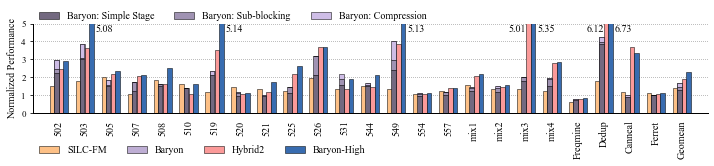

In [35]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
# ax2 = ax.twinx()
easypyplot.format.turn_off_box(ax)

label_fig_xticks = [item + 0.5 for item in fig_xticks]
h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    prop=ft,
    colors=fig_bar_colors)

h_breakdown = easypyplot.barchart.draw(
    ax, breakdown_data_2darr,
    width=breakdown_bar_width,
    breakdown=True,
    # group_names=breakdown_xlabels,
    xticks=breakdown_xticks,
    # xticklabelfontsize=fig_label_fontsize,
    # xticklabelrotation=90,
    prop=ft,
    colors=breakdown_bar_colors)

# h_high = easypyplot.barchart.draw(
#     ax2, high_data_2darr,
#     width=fig_bar_width,
#     breakdown=False,
#     # group_names=high_xlabels,
#     xticks=high_xticks,
#     # xticklabelfontsize=fig_label_fontsize,
#     # xticklabelrotation=30,
#     prop=ft,
#     # log=True,
#     colors=high_bar_colors)

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
# fig_xticks1 = [item - 0.6 for item in fig_xticks]
# ax.set_xticks(fig_xticks1)
abbr_wk_name = []
for item in fig_xlabels:
    if item.startswith('5'):
        abbr_wk_name.append(str(item[0:3]))
    else:
        abbr_wk_name.append(item)
ax.set_xticks(fig_xticks)
ax.set_xticklabels(abbr_wk_name, fontsize=fig_label_fontsize, fontproperties=ft)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

# ax2.yaxis.grid(True)
# ax2.set_ylim(high_ylim)
# ax2.set_yticks(high_yticks)
# ax2.set_ylabel(fig_title, multialignment='center', fontproperties=ft)
''' values on top of each bar '''
texted_entry = [('bwaves', 'Baryon (High Assoc)'), ('lbm', 'Baryon (High Assoc)'), ('fotonik3d', 'Baryon (High Assoc)'),
                ('Dedup', 'Hybrid2'), ('Dedup', 'Baryon (High Assoc)'), ('mix3', 'Hybrid2'), ('mix3', 'Baryon (High Assoc)')]
for group_id, workload in enumerate(workload_dict):
    for entry_id, scheme in enumerate(scheme_dict):
        # print(workload, scheme)
        if (workload, scheme) in texted_entry:
            # print(workload, scheme)
            bar_value = fig_data_2darr[group_id][entry_id]
            bar_x = ax.get_xticks()[group_id]
            if entry_id == 3:
                bar_x += fig_bar_width / len(scheme_dict) + 0.25
            elif entry_id == 2:
                bar_x += fig_bar_width / len(scheme_dict) - 0.85

            bar_text = str('{:.2f}'.format(bar_value))
            ax.text(bar_x, 5, bar_text, ha='left', va='top',
                    fontsize=fig_label_fontsize,
                    # rotation=90,
                    fontproperties=ft,
                    )

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='lower left', bbox_to_anchor=(0.045, 0.15),
        ncol=4, frameon=False, prop=ft, columnspacing=2)
# high_legend = [high_scheme_dict[item] for item in high_scheme_dict][1:]
# fig.legend(h_high[1:], high_legend, loc='upper left', bbox_to_anchor=(0.05, 1.05),
#         ncol=2, frameon=False, prop=ft, columnspacing=0.85)

''' legend '''
legend2 = ['Baryon: ' + breakdown_scheme_dict[item] for item in breakdown_scheme_dict]
fig.legend(h_breakdown, legend2, loc='upper left', bbox_to_anchor=(0.045, 1.05),
        ncol=3, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [36]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures